<a href="https://colab.research.google.com/github/hrshh200/Courseum/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification using CNN

In [2]:
import numpy as np
import random
from tensorflow import keras


In [3]:
from keras.models import Sequential

In [4]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

**Importing datasets of dogs and cats**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
X_train = np.loadtxt('/content/drive/MyDrive/Google Colab/input.csv', delimiter = ',')

In [7]:
X_test = np.loadtxt('/content/drive/MyDrive/Google Colab/input_test.csv', delimiter = ',')

In [8]:
Y_train = np.loadtxt('/content/drive/MyDrive/Google Colab/labels.csv', delimiter = ',')

In [9]:
Y_test = np.loadtxt('/content/drive/MyDrive/Google Colab/labels_test.csv', delimiter = ',')

Reshaping the numpy array to 100x100x3 matrix

In [10]:
X_train = X_train.reshape(len(X_train), 100,100,3)
X_test= X_test.reshape(len(X_test),100,100,3)

Y_train = Y_train.reshape(len(Y_train), 1)
Y_test= Y_test.reshape(len(Y_test),1)

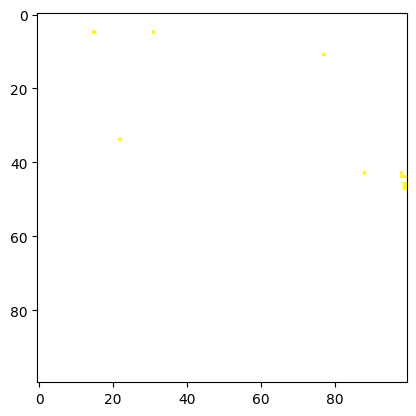

In [11]:
import matplotlib.pyplot as plt

rd= random.randint(0, len(X_train))
plt.imshow(X_train[rd,:])
plt.show()

Creating model

In [12]:
model= Sequential([
      Conv2D(32, (3,3), activation ='relu', input_shape =(100,100,3)),
      MaxPooling2D((2,2)),

      Conv2D(32, (3,3), activation ='relu'),
      MaxPooling2D((2,2)),

      Flatten(),
      Dense(64, activation ='relu'),
      Dense(1, activation='sigmoid')

])

In [13]:
model.compile(loss='binary_crossentropy' ,optimizer= 'adam', metrics=['accuracy'])

In [15]:
model.fit(X_train, Y_train, epochs=5, batch_size= 64)

Epoch 1/5
32/32 [==============================] - 22s 698ms/step - loss: 0.2563 - accuracy: 0.8945
Epoch 2/5
32/32 [==============================] - 22s 680ms/step - loss: 0.1644 - accuracy: 0.9435
Epoch 3/5
32/32 [==============================] - 22s 699ms/step - loss: 0.1059 - accuracy: 0.9680
Epoch 4/5
32/32 [==============================] - 21s 645ms/step - loss: 0.0689 - accuracy: 0.9790
Epoch 5/5
32/32 [==============================] - 22s 701ms/step - loss: 0.0562 - accuracy: 0.9835


In [16]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 92ms/step - loss: 1.4353 - accuracy: 0.6200


[1.4352867603302002, 0.6200000047683716]

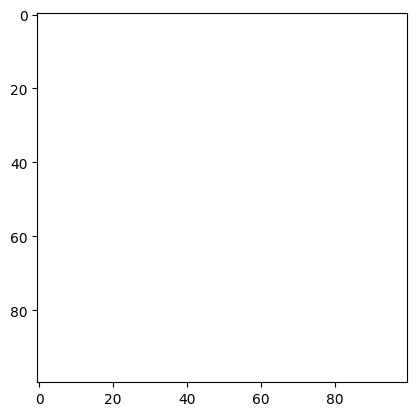

1/1 [==============================] - 0s 52ms/step
The image contains dog


In [19]:
image_random= random.randint(0, len(Y_train))

plt.imshow(X_train[image_random, :])
plt.show()

y_pred= model.predict(X_train[image_random,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred==0):
  print("The image contains dog")
else:
  print("The image contains cat")